# HW 4
Задачі 15 та 16

Корешков

In [1]:
import numpy as np
import scipy as sp
import scipy.stats
from collections import namedtuple

alpha = significance = 0.025
verbose = True

In [2]:
cannot_deny_h0 = "Не можемо відхилити нульову гіпотезу із заданим рівнем значущості."
deny_h0 = "Відхиляємо нульову гіпотезу, приймаючи альтернативну. "

## Завдання 15

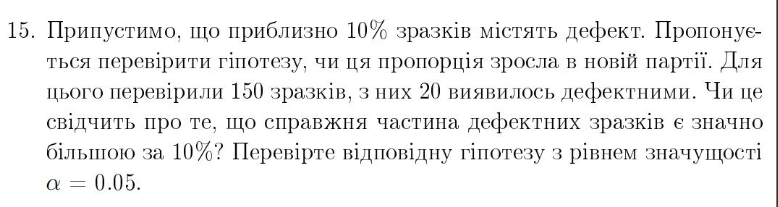



In [3]:
N = 150
N_defective = 20
p0 = 0.1
alpha = significance = 0.05

Моделюємо дефектність розподілом Бернулі, $p$ - частка дефектних зразків.  
$X_k = 1$ якщо $k$-тий зразок дефектний, інакше $X_k = 0$

$X_k \sim B(p), \; iid$

Працюємо із вибіркою з цим розподілом. Для неї можна застосувати ЦГТ:

$$\sqrt{n}\frac{ \overline X_n - EX }{\sqrt{DX}} \longrightarrow \mathcal N(0,1)$$

$EX = p$  
$DX = E(X-EX)^2 = (0-p)^2\cdot(1-p) + (1-p)^2 \cdot p = p(1-p)(p+1-p)=p(1-p)$  

$$U_n = \sqrt{n} \frac{\overline X_n - p}{\sqrt{p(1-p)}} \longrightarrow \mathcal N (0,1)$$


### Перший спосіб (ЦГТ)

**Цей підхід, судячи з усього, називають z-тестом**

Нехай нульова гіпотеза полягає в тому, що частина дефектих деталей становить $0.1$.  
Альтернативна полягає в тому, що частина більше за $0.1$.

$P(U_n \ge z_\alpha) = 1-\Phi_{0,1}(z_\alpha) = \alpha$  
$z_\alpha = \Phi_{0,1}^{-1}(1-\alpha)$  

Відкидаємо нульову гіпотезу якщо $U_n > z_\alpha$.  

In [4]:
20/150

0.13333333333333333

In [5]:
u = np.sqrt(N) * (20/150 - 0.1) / np.sqrt(0.1 * (1 - 0.1))
z = sp.stats.norm.ppf(1-significance)
print(f"{u=:.3g}   {z=:.3g}")

if u < z:
    print(cannot_deny_h0)
else:
    print(deny_h0)

u=1.36   z=1.64
Не можемо відхилити нульову гіпотезу із заданим рівнем значущості.


### Другий спосіб (біноміальний критерій)

Знаємо точний розподіл суми бернулівських величин

$S = \sum_{k=1}^N X_k \sim B(p, N)$, для якого

$P(S = x) = C_{N}^{x}p^x(1-p)^{N-x}$ для $x \in \overline{0,N}$



За нульової гіпотези $p = p_0$.  
Альтернативна гіпотеза полягає в тому, що $p > p_0$.

Нехай $d$ - кількість успіхів, тобто дефектних деталей.

$P(S = d \mid p=p_0) = C_{N}^{d}p^d(1-p)^{N-d}$

$P(S > N \cdot p_0 \mid p=p_0) = \sum_{d=[Np_0]}^N C_{N}^{d}p^d(1-p)^{N-d} < \alpha$

Можна (перебором) знайти точне значення $S_{crit}$ для якого $P(S > S_{crit} \mid p = p_0) \le \alpha$.
Тоді відкидаємо нульову гіпотезу якщо $S > S_{crit}$.


Інакше, можна спочатку обчислити  
$P = P(S > d \mid p=p_0)$  
Це значення має бути менше $\alpha$.
Відкидаємо нульову гіпотезу якщо $P > \alpha$. 
В даному випадку, $P$ буде $p$-value.

S=20   S_crit=21
Не можемо відхилити нульову гіпотезу із заданим рівнем значущості.


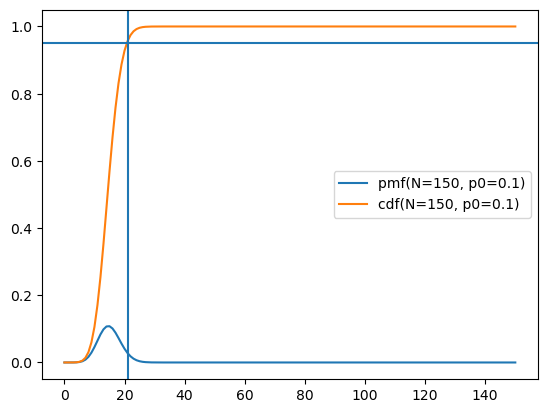

In [6]:
# 1. "зворотній" метод через S_crit
import matplotlib.pyplot as plt

dd = np.arange(0,N+1)
pmf = sp.stats.binom.pmf(dd, N, p0)
cdf = sp.stats.binom.cdf(dd, N, p0)

S_crit = np.searchsorted(cdf, 1-alpha)
print(f"S={N_defective}   {S_crit=}")


if N_defective < S_crit:
    print(cannot_deny_h0)
else:
    print(deny_h0)




plt.plot(dd, pmf, label=f'pmf({N=}, {p0=})')
plt.plot(dd, cdf, label=f'cdf({N=}, {p0=})')
plt.axvline(S_crit)
plt.axhline(1-alpha)
plt.legend()



In [7]:
# 2. "прямий" метод через p-value

P = 1 - sp.stats.binom.cdf(N_defective-1, N, p0)

print(f"{P=:.3g}   {alpha=}")

if P > alpha:
    print(cannot_deny_h0)
else:
    print(deny_h0)

P=0.113   alpha=0.05
Не можемо відхилити нульову гіпотезу із заданим рівнем значущості.


Бачимо, що $S_{crit}$ насправді близько (20 проти критичного 21), і бачимо наскільки в ймовірнісному сенсі через $p$-value.


### біноміальний критерій через вбудовану функцію scipy

In [8]:
result = sp.stats.binomtest(20, 150, 0.1, alternative='greater')
result

BinomTestResult(k=20, n=150, alternative='greater', statistic=0.13333333333333333, pvalue=0.11297657016173479)

In [9]:
result.proportion_ci(1-significance)

ConfidenceInterval(low=0.09014414487976206, high=1.0)

Маємо практично ідентичний результат, що є гарним знаком для мене

### Третій (майже) спосіб (хі-квадрат критерій для простої гіпотези про параметр поліноміального розподілу)

**Але цей спосіб лише двосторонній, він не дає обрати "напрямок" альтернативної гіпотези!**

$$\rho(X) = \sum_{i=1}^r \frac{(\nu_i - np^0_i)^2}{np^0_i} \longrightarrow \chi^2(r-1)$$

що в біноміальному випадку виглядає як

$$\rho(X) = \frac{( (n-d) - n(1-p))^2}{n(1-p)} + \frac{( d - np)^2}{np} = \frac{( d - np)^2}{n(1-p)} + \frac{( d - np)^2}{np} = \frac{(d-np)^2}{np(1-p)} = 
\left( \frac{|d-np|}{\sqrt{np(1-p)}} \right)^2 \longrightarrow \chi^2(1) $$

За ЦГТ, 
$\frac{|d-np|}{\sqrt{np(1-p)}} \longrightarrow \mathcal N (0,1)$.  
Також відомо, що $(\mathcal N (0,1))^2 = \chi^2(1)$, тобто все сходиться

In [10]:
R = (N_defective - N*p0)**2 / (N * p0 * (1-p0))
c = sp.stats.chi2.ppf( 1-alpha, df=1 )

print(f"{R=:.3g}   {c=:.3g}")

if R < c:
    print(cannot_deny_h0)
else:
    print(deny_h0)

R=1.85   c=3.84
Не можемо відхилити нульову гіпотезу із заданим рівнем значущості.


In [11]:
sp.stats.chisquare([N_defective, N-N_defective], [N*p0, N-N*p0])

Power_divergenceResult(statistic=1.8518518518518519, pvalue=0.1735681665559176)

Маємо те саме значення статистики, що радує. Тест також провалився, не відкидаємо нульову гіпотезу, бо p-value більше за 0.05

## Завдання 16

**TODO**